# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.shape

(1000, 40)

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df = df.drop(["_c39"], axis =1)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['authorities_contacted']= le.fit_transform(df['authorities_contacted'])

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [16]:
# Replace '?' with the No as no occurs more than yes
df['police_report_available'] = df['police_report_available'].replace('No', 'NO')


In [17]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

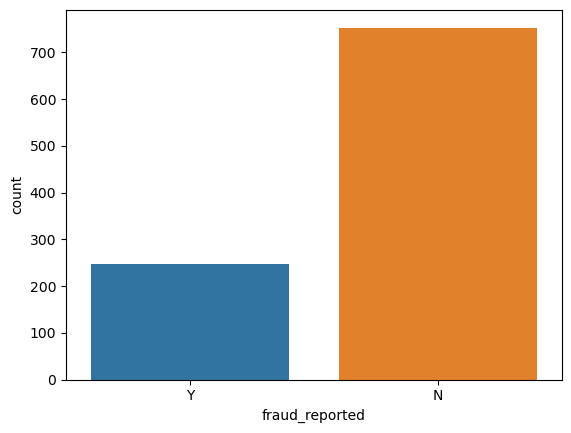

In [18]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df)

<Axes: xlabel='incident_state', ylabel='count'>

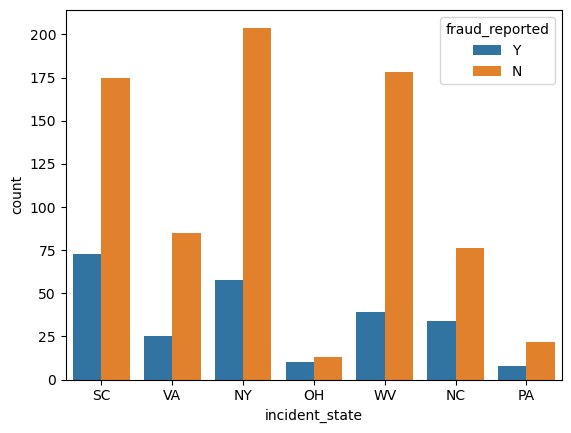

In [19]:
df['incident_state'].value_counts()
sns.countplot(x='incident_state', data=df, hue='fraud_reported')

<Axes: xlabel='policy_state', ylabel='count'>

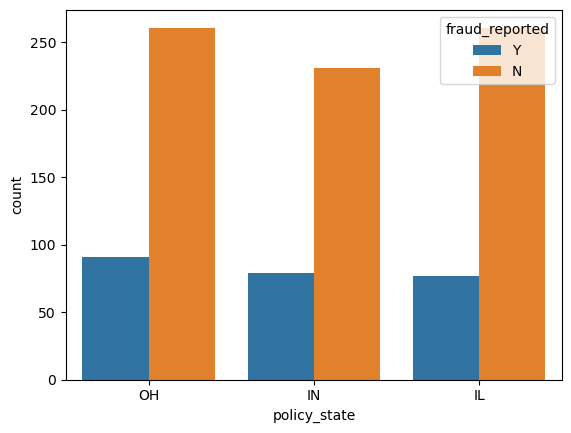

In [20]:
sns.countplot(x='policy_state', data=df, hue='fraud_reported')

<Axes: xlabel='incident_type', ylabel='count'>

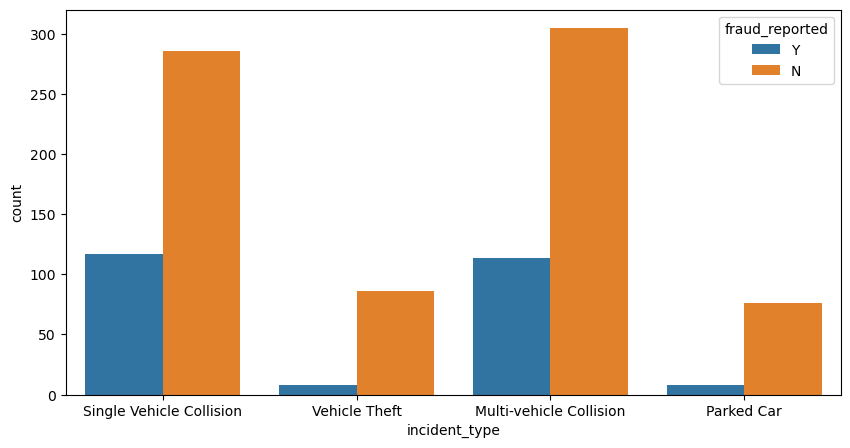

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type', data=df, hue='fraud_reported')

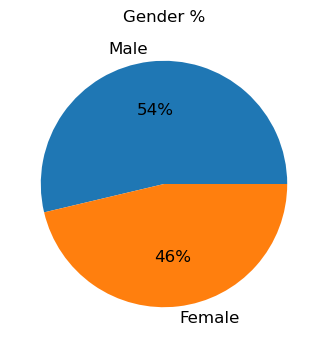

In [44]:
fig = plt.figure(figsize=(6,4))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('Gender %')
ax.set(ylabel='')
plt.show()

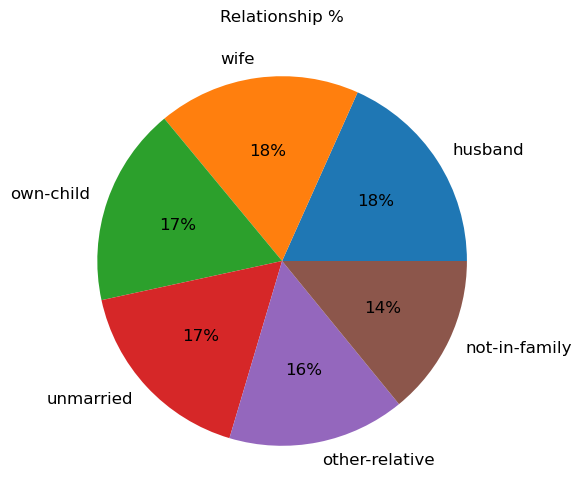

In [45]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.f%%',labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('Relationship %')
ax.set(ylabel='')
plt.show()

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [25]:

df.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [26]:
df.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [27]:
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [28]:

df.replace('?', np.nan, inplace = True)

In [29]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [30]:

df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [31]:

df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [34]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [36]:
df['policy_csl'] = df['policy_csl'].astype(str)


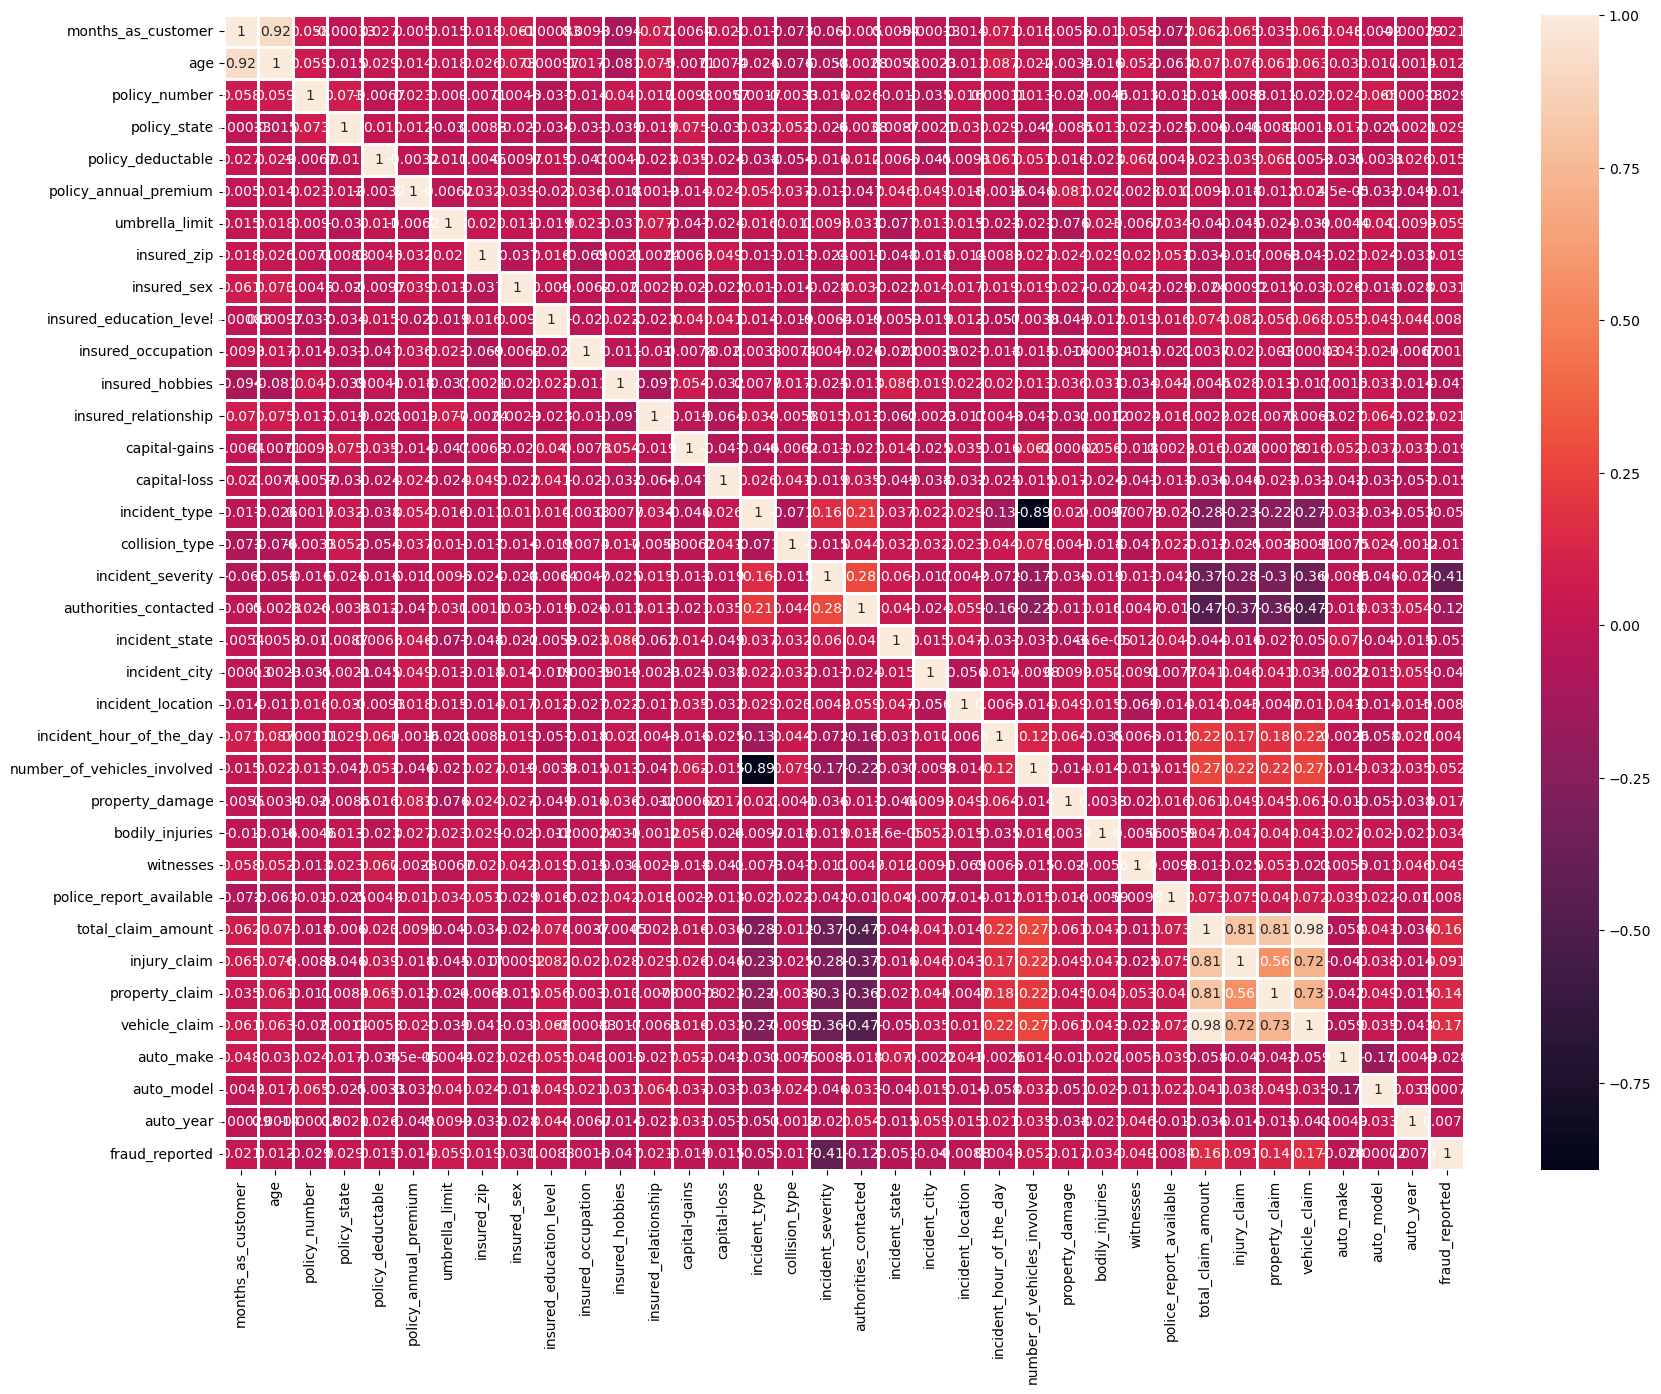

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data=numeric_df.corr(), annot=True, fmt='.2g', linewidth=1)
plt.show()


In [48]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

corrs = numeric_df.corr()['fraud_reported']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
police_report_available        0.008399
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [49]:
feat=['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit',\
'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state',
'insured_relationship', 'months_as_customer']

In [50]:
X = df[feat]
y = df.fraud_reported

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [53]:
y_train.value_counts()

fraud_reported
0    565
1    185
Name: count, dtype: int64

In [64]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([565, 565], dtype=int64)

In [65]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('DT', DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF', RandomForestClassifier(n_estimators=500)))
    level0.append(('KNN', KNeighborsClassifier(5)))
    level0.append(('XGB', XGBClassifier(objective= 'binary:logistic', use_label_encoder=False)))
    level1 = LogisticRegression() 
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=10)
    models['RF'] = RandomForestClassifier(n_estimators=500)
    models['KNN'] = KNeighborsClassifier(5)
    #models['ADA'] = AdaBoostClassifier(n_estimators=500)
    models['XGB'] = XGBClassifier(objective= 'binary:logistic', eval_metric='logloss',use_label_encoder=False)
    models['Stacking'] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))

>DT 0.70 (0.04)
>RF 0.78 (0.03)
>KNN 0.67 (0.04)
>XGB 0.77 (0.03)
>Stacking 0.79 (0.03)


Stacking got high accuracy amongst all!

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Therefore, Random forest  gives high accuracy amongst all other 